# Forecast U.S. dollars foreign exchange reserve' share

This project forecast U.S. dollars foreign exhchange reserve' share, assuming the trends of the variables that could affect its values does not change.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [2]:
df=pd.read_csv("COFER_07-01-2023 02-51-41-63_timeSeries.csv")
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,1995,1996,1997,1998,1999,...,2021Q2,2021Q3,2021Q4,2022,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,Unnamed: 130
0,Emerging and Developing Economies,200,"Total Foreign Exchange Reserves, US Dollars",RAXGFX_USD,Value,4.524046e+11,5.438630e+11,5.995538e+11,6.141255e+11,6.531675e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Emerging and Developing Economies,200,"Total Foreign Exchange Reserves, US Dollars",RAXGFX_USD,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,1,"Total Foreign Exchange Reserves, US Dollars",RAXGFX_USD,Value,1.389817e+12,1.566272e+12,1.616244e+12,1.643824e+12,1.782706e+12,...,NaN,NaN,NaN,1.191429e+13,NaN,NaN,NaN,NaN,NaN,NaN


Since some columns contains quarterly data and some other yearly data, I should select the columns related to the data frequency I want to use: quarter.

In [3]:
# select only quarterly data
cols=['Country Name','Indicator Name']
[cols.append(i) for i in list(df.columns) if len(i)==6 and i[4]=='Q' ]
cols
df=df[cols]
df.head(3)

,Country Name,Indicator Name,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,2000Q3,2000Q4,...,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
0,Emerging and Developing Economies,"Total Foreign Exchange Reserves, US Dollars",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Emerging and Developing Economies,"Total Foreign Exchange Reserves, US Dollars",6.059264e+11,6.214200e+11,6.362330e+11,6.531675e+11,6.694974e+11,6.675976e+11,6.792296e+11,7.110582e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,"Total Foreign Exchange Reserves, US Dollars",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# select aggregate data for the World, where the indicator is the allocated reserves, claims in different currencies.
ind=[df.index[i] for i in range(df.shape[0]) if (df.loc[i,'Indicator Name'].startswith('Allocated Reserves, Claims')) and (df.loc[i,'Country Name']=='World') ]
df1=df.iloc[ind,:]
df1=df1.reset_index()
df1.head(3)

,index,Country Name,Indicator Name,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,2000Q3,...,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
0,28,World,"Allocated Reserves, Claims in Australian dolla...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,World,"Allocated Reserves, Claims in Australian dolla...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.168706e+11,2.148905e+11,2.184440e+11,2.142394e+11,2.213211e+11,2.219100e+11,2.091426e+11,2.047780e+11,2.165950e+11,2.211036e+11
2,30,World,"Allocated Reserves, Claims in Canadian dollars...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a new varaible of the indicator name: Currency. The new variable reduce the length of the previous Indicator Name.


In [5]:

df1['Currency']=[i[30:len(i)-10] for i in df1['Indicator Name']]
df1.head(3)


,index,Country Name,Indicator Name,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,2000Q3,...,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,Currency
0,28,World,"Allocated Reserves, Claims in Australian dolla...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Australian dollars,"
1,29,World,"Allocated Reserves, Claims in Australian dolla...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.148905e+11,2.184440e+11,2.142394e+11,2.213211e+11,2.219100e+11,2.091426e+11,2.047780e+11,2.165950e+11,2.211036e+11,"Australian dollars,"
2,30,World,"Allocated Reserves, Claims in Canadian dollars...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Canadian dollars,"


Index of the data frame is set to the new variable, Currency.

In [6]:
df1=df1.set_index('Currency')
df1=df1.iloc[:,3:]
df1

,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,...,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
Currency,,,,,,,,,,,,,,,,,,,,,
"Australian dollars,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Australian dollars,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.168706e+11,2.148905e+11,2.184440e+11,2.142394e+11,2.213211e+11,2.219100e+11,2.091426e+11,2.047780e+11,2.165950e+11,2.211036e+11
"Canadian dollars,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Canadian dollars,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.465672e+11,2.500072e+11,2.700075e+11,2.642662e+11,2.869321e+11,2.860168e+11,2.757462e+11,2.609159e+11,2.627403e+11,2.707499e+11
"euro,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"euro,",2.246085e+11,2.238537e+11,2.427024e+11,2.469505e+11,2.451731e+11,2.525490e+11,2.487571e+11,2.776926e+11,2.669648e+11,2.663799e+11,...,2.526410e+12,2.404795e+12,2.458889e+12,2.456739e+12,2.481340e+12,2.328348e+12,2.187635e+12,2.086245e+12,2.248355e+12,2.204667e+12
"Japanese yen,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Japanese yen,",7.477350e+10,7.167374e+10,8.272603e+10,8.793869e+10,8.875949e+10,8.646723e+10,9.418047e+10,9.207802e+10,8.311001e+10,8.091272e+10,...,7.153480e+11,6.862958e+11,6.721979e+11,6.796808e+11,6.651028e+11,6.264391e+11,5.726468e+11,5.601052e+11,6.073032e+11,6.094693e+11
"other currencies,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing all rows that contains only NaN values

In [7]:
def all_nan(x):
    '''This function remove indicates if a list contains only NaN values, returning a logical value.
    '''
    import numpy as np
    y=list()
    for i in range(len(x)):
        if np.isnan(x[i])==True:
            y.append(1)
    if len(y)==len(x):
        return True
    else:
        return False
all_nan(list(df1.iloc[0,:]))       

True

In [8]:
# removing all rows which contains no values other than NaN
df2=df1[[all_nan(df1.iloc[i,:])==False for i in range(df1.shape[0])]]
df2=df2.transpose()
df2.head(3)

Currency,"Australian dollars,","Canadian dollars,","euro,","Japanese yen,","other currencies,","pounds sterling,","Swiss francs,","U.S. dollars,","Chinese renminbi,"
1999Q1,NaN,NaN,2.246085e+11,7.477350e+10,2.012133e+10,3.401470e+10,3.571276e+09,8.823251e+11,NaN
1999Q2,NaN,NaN,2.238537e+11,7.167374e+10,2.084513e+10,3.557374e+10,3.092357e+09,9.186851e+11,NaN
1999Q3,NaN,NaN,2.427024e+11,8.272603e+10,2.255453e+10,3.702931e+10,3.193278e+09,9.360390e+11,NaN


I prefer to analyse ratio values instead of amount values of foreign exchange reserves.

In [9]:
# calculated total by row, to be able to calculate ratios
tot_by_period=[np.sum(df2.iloc[i,:]) for i in range(df2.shape[0])] 


In [10]:
df2.columns

Index(['Australian dollars, ', 'Canadian dollars, ', 'euro, ',
       'Japanese yen, ', 'other currencies, ', 'pounds sterling, ',
       'Swiss francs, ', 'U.S. dollars, ', 'Chinese renminbi, '],
      dtype='object', name='Currency')

C:\Users\rcadet\AppData\Local\Temp\ipykernel_12752\3256518077.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dd.index=pd.to_datetime(list(dd.index))
c:\Users\rcadet\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Text(2000-01-01 00:00:00, 28, 'Source: Realized by Raulin L. Cadet, with data from IMF.')

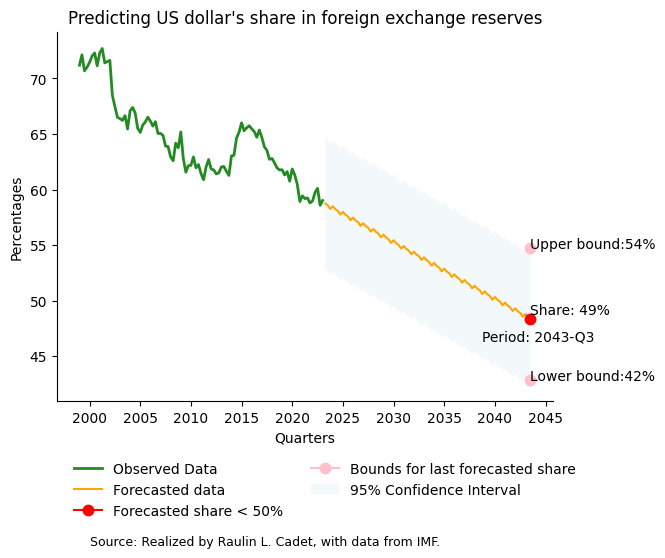

In [11]:


dd=df2
# dd.index=pd.to_datetime(dd.index)
dd['Total']=tot_by_period

# dd['Date'] = pd.to_datetime(dd['Date'])
# dd.set_index('Date', inplace=True)
dd.index=pd.to_datetime(list(dd.index))
# Fit Holt-Winters additive model
model=ExponentialSmoothing((dd['U.S. dollars, ']/dd['Total'])*100, trend='add', seasonal='add', seasonal_periods=4)
model_fit = model.fit()

# Forecast future values
forecast_steps = 1  # start with this number of steps to forecast
forecast=[101,101]
while round(forecast[len(forecast)-1])>=49:

    forecast = model_fit.forecast(steps=forecast_steps)
    forecast_steps=forecast_steps+1

# Generate confidence interval data (example values for 95% CI)
confidence_level = 0.95
stderr = np.std(forecast)  # Example standard error, adjust this based on your data
z_score = 1.96  # Z-score for 95% confidence interval

lower_bound = forecast - z_score * stderr  # Lower bound of confidence interval
upper_bound = forecast + z_score * stderr  # Upper bound of confidence interval


# # Fill the area between the lower and upper bounds to create a shadow
# plt.fill_between(x, lower_bound, upper_bound, alpha=0.3, label='95% Confidence Interval')

   

##############
fig=plt.subplot()
plt.plot((dd['U.S. dollars, ']/dd['Total']*100), label='Observed Data',color='forestgreen',linewidth=2)
plt.plot(forecast,color='orange',label='Forecasted data')

plt.plot(forecast.index[len(forecast)-1],forecast[len(forecast)-1],marker='.',color='red',markersize=15,label='Forecasted share < 50%')
plt.plot(lower_bound.index[len(lower_bound)-1],lower_bound[len(lower_bound)-3],marker='.',color='pink',markersize=15)
plt.plot(upper_bound.index[len(upper_bound)-1],upper_bound[len(upper_bound)-3],marker='.',color='pink',markersize=15,
         label='Bounds for last forecasted share')

plt.text(s='Period: '+str((forecast.index[len(forecast)-1]).year)+'-'+'Q'+str((forecast.index[len(forecast)-1]).quarter),
         x=forecast.index[len(forecast)-20],y=(forecast[len(forecast)-1])-2)
plt.text(s='Share: 49%',x=forecast.index[len(forecast)-1],y=(forecast[len(forecast)-3])) 
plt.text(s='Upper bound:'+str(round(upper_bound[len(upper_bound)-1]))+'%',x=upper_bound.index[len(upper_bound)-1],y=(upper_bound[len(upper_bound)-3]))
plt.text(s='Lower bound:'+str(round(lower_bound[len(lower_bound)-1]))+'%',x=lower_bound.index[len(lower_bound)-1],y=(lower_bound[len(lower_bound)-3]))

plt.ylabel('Percentages')
plt.xlabel('Quarters')
plt.title("Predicting US dollar's share in foreign exchange reserves")
# Fill the area between the lower and upper bounds to create a shadow
plt.fill_between( x=forecast.index,y1=lower_bound, y2=upper_bound, alpha=0.05, label='95% Confidence Interval')
fig.spines[['right', 'top']].set_visible(False) 
fig.legend(ncol=2,loc='lower left',frameon=False,bbox_to_anchor=(0.01,-0.35))  # to add legend, without frame
fig.text(pd.to_datetime('2000'), 28, 'Source: Realized by Raulin L. Cadet, with data from IMF.',  
 ha='left',fontsize=9)